<a href="https://colab.research.google.com/github/Nirjhar100/Major-FakeNews/blob/master/cnn_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
df = pd.read_csv('./clean_data.csv')
print(df.shape)
df.tail()

(25336, 3)


,Unnamed: 0,subreddit,title
25331,14995,0,cdc urges citizens to avoid spreading coronavi...
25332,14996,0,tito s vodka is warning consumers that it can ...
25333,14997,0,presindent bolsonaro hires comedian to offer b...
25334,14998,0,cops take seized suv for joyride owner tracks ...
25335,14999,0,dead people shot at celebration of life party


In [0]:
X=df['title']
y=df['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                     random_state=42)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


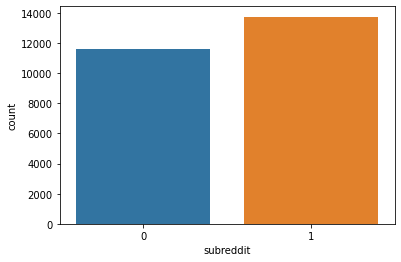

In [0]:
import seaborn as sns
sns.countplot(x='subreddit', data=df)

In [0]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(X_train)
train_X = tokenizer.texts_to_sequences(X_train)
test_X = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index)+1
print(vocab_size)
print(X_train[1])
print(train_X[1])

23394
florida governor deploys national guard to force residents back into malls movie theaters
[3732, 873, 195, 1039, 8, 1892, 165, 3, 126, 144]


In [0]:
maxlen = 50
train_X = pad_sequences(train_X, padding = 'post', maxlen=maxlen)
test_X = pad_sequences(test_X, padding = 'post', maxlen = maxlen)
print(train_X[0, :])

In [0]:
embedding_dim = 100
#input_dim = X_train.shape[1] #number of features
model = Sequential()
#model.add(layers.Dense(64,input_dim = input_dim,activation = 'relu'))
#model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                           input_length = maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
#model.add(layers.Dense(64, activation = 'relu'))
#model.add(layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2339400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 46, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,403,657
Trainable params: 2,403,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(train_X,y_train,epochs = 6, verbose = 1, validation_data=(test_X,y_test),batch_size=1024)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22802 samples, validate on 2534 samples
Epoch 1/6
22802/22802 [==============================] - 9s 385us/step - loss: 0.6576 - accuracy: 0.6144 - val_loss: 0.5794 - val_accuracy: 0.7873
Epoch 2/6
22802/22802 [==============================] - 8s 362us/step - loss: 0.4651 - accuracy: 0.8281 - val_loss: 0.3592 - val_accuracy: 0.8504
Epoch 3/6
22802/22802 [==============================] - 8s 366us/step - loss: 0.2968 - accuracy: 0.8783 - val_loss: 0.3020 - val_accuracy: 0.8658
Epoch 4/6
22802/22802 [==============================] - 8s 366us/step - loss: 0.2308 - accuracy: 0.9091 - val_loss: 0.3017 - val_accuracy: 0.8682
Epoch 5/6
22802/22802 [==============================] - 8s 366us/step - loss: 0.1939 - accuracy: 0.9272 - val_loss: 0.3131 - val_accuracy: 0.8702
Epoch 6/6
22802/22802 [==============================] - 8s 361us/step - loss: 0.1666 - accuracy: 0.9399 - val_loss: 0.3285 - val_accuracy: 0.8670


In [0]:
loss, accuracy = model.evaluate(train_X, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_X, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9518
Testing Accuracy:  0.8670
